In [1]:
#highest grossing genre 
#what genre works in foreign market
#frequency of director apperance 
#information that will help microsoft be successful
#how does budget affect the outcome (movie budget clean, bom movie gross clean)

#time of release (personal bens)

# How does budget affect outcome?

In [22]:
import pandas as pd

In [85]:
# Assigning the movie gross table to variable
tn_movie_budgets_clean = pd.read_csv("tn_movie_budgets_clean.csv")
df = pd.read_csv("joined_gross_budget_cleaned.csv")
df.head()

,title,release_date,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
0,(500) Days of Summer,Jul 17,7500000.0,32425665.0,34439060.0,26939060.0,78.22
1,10 Cloverfield Lane,Mar 11,5000000.0,72082999.0,108286422.0,103286422.0,95.38
2,10 Things I Hate About You,Mar 31,13000000.0,38177966.0,60413950.0,47413950.0,78.48
3,"10,000 B.C.",Mar 7,105000000.0,94784201.0,269065678.0,164065678.0,60.98
4,12 Monkeys,Dec 27,29000000.0,57141459.0,168841459.0,139841459.0,82.82


In [86]:
df = df[["production_budget", "net_prof"]]
df.head()

,production_budget,net_prof
0,7500000.0,26939060.0
1,5000000.0,103286422.0
2,13000000.0,47413950.0
3,105000000.0,164065678.0
4,29000000.0,139841459.0


In [24]:
tn_movie_budgets_clean.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,Dec 18,Avatar,425000000,760507625,2776345279
1,1,May 20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,Jun 7,Dark Phoenix,350000000,42762350,149762350
3,3,May 1,Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,Dec 15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [25]:
# Assigning the bom movie to the variable
bom_movie_gross_clean = pd.read_csv("bom_movie_gross_clean")

In [26]:
bom_movie_gross_clean.head()

,Unnamed: 0,title,domestic_gross,year
0,0,Toy Story 3,415000000,2010
1,1,Alice in Wonderland (2010),334200000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,296000000,2010
3,3,Inception,292600000,2010
4,4,Shrek Forever After,238700000,2010


In [27]:
#checking the shape of the movie budgets
tn_movie_budgets_clean.shape

(5782, 6)

In [28]:
#checking the shape of the bom_movie
bom_movie_gross_clean.shape

(3387, 4)

In [29]:
# renaming domestic_gross column in bom movie gross
bom_movie_gross_clean = bom_movie_gross_clean.rename(columns={'domestic_gross': 'domestic_gross2'})
bom_movie_gross_clean.head()


,Unnamed: 0,title,domestic_gross2,year
0,0,Toy Story 3,415000000,2010
1,1,Alice in Wonderland (2010),334200000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,296000000,2010
3,3,Inception,292600000,2010
4,4,Shrek Forever After,238700000,2010


In [30]:
bom_movie_gross_clean["year"].unique


<bound method Series.unique of 0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64>

In [31]:
bom_movie_gross_clean["title"].unique

<bound method Series.unique of 0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object>

In [32]:
tn_movie_budgets_clean["movie"].unique

<bound method Series.unique of 0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object>

In [33]:
#changing column name from title to column in bon movie
bom_movie_gross_clean = bom_movie_gross_clean.rename(columns={'title': 'movie'})
bom_movie_gross_clean.head()

,Unnamed: 0,movie,domestic_gross2,year
0,0,Toy Story 3,415000000,2010
1,1,Alice in Wonderland (2010),334200000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,296000000,2010
3,3,Inception,292600000,2010
4,4,Shrek Forever After,238700000,2010


In [34]:
tn_movie_budgets_clean.columns

Index(['Unnamed: 0', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [35]:
#preparing data frames for merging
tn_movie_budgets_clean = tn_movie_budgets_clean.drop(["Unnamed: 0"], axis=1)
bom_movie_gross_clean = bom_movie_gross_clean.drop(["Unnamed: 0"], axis=1)
tn_movie_budgets_clean.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Dec 18,Avatar,425000000,760507625,2776345279
1,May 20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Jun 7,Dark Phoenix,350000000,42762350,149762350
3,May 1,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Dec 15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [38]:
#setting index
tn_movie_budgets_clean_index = tn_movie_budgets_clean.set_index("movie")
bom_movie_gross_clean_index = bom_movie_gross_clean.set_index("movie")
tn_movie_budgets_clean_index.columns
bom_movie_gross_clean_index.columns
tn_movie_budgets_clean_index.head()
bom_movie_gross_clean_index.head()

,domestic_gross2,year
movie,,
Toy Story 3,415000000,2010
Alice in Wonderland (2010),334200000,2010
Harry Potter and the Deathly Hallows Part 1,296000000,2010
Inception,292600000,2010
Shrek Forever After,238700000,2010


In [41]:
#merging data frames
joined_df = tn_movie_budgets_clean_index.join(bom_movie_gross_clean_index, how='outer')
joined_df.head()



,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross2,year
movie,,,,,,
#Horror,Nov 20,1500000.0,0.0,0.0,NaN,NaN
'71,NaN,NaN,NaN,NaN,1300000.0,2015.0
(500) Days of Summer,Jul 17,7500000.0,32425665.0,34439060.0,NaN,NaN
"1,000 Times Good Night",NaN,NaN,NaN,NaN,53900.0,2014.0
10 Cloverfield Lane,Mar 11,5000000.0,72082999.0,108286422.0,72100000.0,2016.0


In [42]:
joined_df.tail()

,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross2,year
movie,,,,,,
xXx,Aug 9,70000000.0,141930000.0,267200000.0,NaN,NaN
xXx: Return of Xander Cage,Jan 20,85000000.0,44898413.0,345033359.0,NaN,NaN
xXx: The Return of Xander Cage,NaN,NaN,NaN,NaN,44900000.0,2017.0
Ã l\'intÃ©rieur,Apr 15,3000000.0,0.0,895932.0,NaN,NaN
é·æ±ä¸è (CJ7),Mar 7,20000000.0,206678.0,47300771.0,NaN,NaN


In [43]:
joined_df.shape

(7931, 6)

In [44]:
joined_df.isna().sum()

release_date         2149
production_budget    2149
domestic_gross       2149
worldwide_gross      2149
domestic_gross2      4535
year                 4535
dtype: int64

In [45]:
non_empty_domestic_gross2 = joined_df[joined_df["domestic_gross2"] > 0]
non_empty_domestic_gross2.isna().sum()
non_empty_domestic_gross2.shape

(3368, 6)

In [46]:
#dropping rows where the production budget values are missing
joined_df = joined_df[joined_df["production_budget"] > 0]
joined_df.isna().sum()

release_date            0
production_budget       0
domestic_gross          0
worldwide_gross         0
domestic_gross2      4535
year                 4535
dtype: int64

In [47]:
joined_df["domestic_gross"].value_counts()

0.0           548
8000000.0       9
7000000.0       7
2000000.0       7
10000000.0      6
             ... 
304602.0        1
38623460.0      1
25078937.0      1
529766.0        1
37485528.0      1
Name: domestic_gross, Length: 5164, dtype: int64

In [48]:
type(joined_df["domestic_gross"])

pandas.core.series.Series

In [49]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 6 columns):
release_date         5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
domestic_gross2      1247 non-null float64
year                 1247 non-null float64
dtypes: float64(5), object(1)
memory usage: 316.2+ KB


In [50]:
joined_df.describe()

,production_budget,domestic_gross,worldwide_gross,domestic_gross2,year
count,5.782000e+03,5.782000e+03,5.782000e+03,1.247000e+03,1247.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,6.052630e+07,2013.551724
std,4.181208e+07,6.824060e+07,1.747200e+08,8.474276e+07,2.541219
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2010.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,7.300000e+06,2011.000000
50%,1.700000e+07,1.722594e+07,2.798445e+07,3.330000e+07,2013.000000
75%,4.000000e+07,5.234866e+07,9.764584e+07,7.405000e+07,2016.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,7.001000e+08,2018.000000


In [51]:
joined_df.shape

(5782, 6)

In [52]:
joined_df.drop
new_joined_df = joined_df.drop(joined_df[(joined_df['domestic_gross'] == 0.0)].index)

In [53]:
new_joined_df.tail()

,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross2,year
movie,,,,,,
eXistenZ,Apr 23,20700000.0,2840417.0,2840417.0,NaN,NaN
mother!,Sep 15,30000000.0,17800004.0,42531076.0,17800000.0,2017.0
xXx,Aug 9,70000000.0,141930000.0,267200000.0,NaN,NaN
xXx: Return of Xander Cage,Jan 20,85000000.0,44898413.0,345033359.0,NaN,NaN
é·æ±ä¸è (CJ7),Mar 7,20000000.0,206678.0,47300771.0,NaN,NaN


In [54]:
new_joined_df.shape

(5224, 6)

In [55]:
new_joined_df["domestic_gross2"].value_counts()

1800000.0      10
3800000.0       7
1000000.0       7
1500000.0       7
3100000.0       6
               ..
550000.0        1
42200000.0      1
39400000.0      1
6400000.0       1
127400000.0     1
Name: domestic_gross2, Length: 838, dtype: int64

In [56]:
#dropping domestic_gross2 column because it is reduntant and contains a lot of missing values
new_joined_df = new_joined_df.drop(["domestic_gross2"], axis=1)
new_joined_df.head()

,release_date,production_budget,domestic_gross,worldwide_gross,year
movie,,,,,
(500) Days of Summer,Jul 17,7500000.0,32425665.0,34439060.0,NaN
10 Cloverfield Lane,Mar 11,5000000.0,72082999.0,108286422.0,2016.0
10 Days in a Madhouse,Nov 11,12000000.0,14616.0,14616.0,NaN
10 Things I Hate About You,Mar 31,13000000.0,38177966.0,60413950.0,NaN
"10,000 B.C.",Mar 7,105000000.0,94784201.0,269065678.0,NaN


In [57]:
new_joined_df["year"].value_counts()

2010.0    183
2011.0    167
2015.0    145
2012.0    144
2016.0    140
2013.0    134
2014.0    126
2017.0    103
2018.0     93
Name: year, dtype: int64

In [58]:
new_joined_df["year"].isna().sum()

3989

In [59]:
grouped_by_year = new_joined_df.groupby("year")
grouped_by_year.head()

,release_date,production_budget,domestic_gross,worldwide_gross,year
movie,,,,,
(500) Days of Summer,Jul 17,7500000.0,32425665.0,34439060.0,NaN
10 Cloverfield Lane,Mar 11,5000000.0,72082999.0,108286422.0,2016.0
10 Days in a Madhouse,Nov 11,12000000.0,14616.0,14616.0,NaN
10 Things I Hate About You,Mar 31,13000000.0,38177966.0,60413950.0,NaN
"10,000 B.C.",Mar 7,105000000.0,94784201.0,269065678.0,NaN
102 Dalmatians,Nov 22,85000000.0,66941559.0,66941559.0,NaN
12 Strong,Jan 19,35000000.0,45819713.0,71118378.0,2018.0
12 Years a Slave,Oct 18,20000000.0,56671993.0,181025343.0,2013.0
127 Hours,Nov 5,18000000.0,18335230.0,60217171.0,2010.0


In [60]:
grouped_by_year.tail()

,release_date,production_budget,domestic_gross,worldwide_gross,year
movie,,,,,
Veronica Mars,Mar 14,6000000.0,3322127.0,3.485383e+06,2014.0
Vice,Dec 25,60000000.0,47836282.0,7.088317e+07,2018.0
War for the Planet of the Apes,Jul 14,152000000.0,146880162.0,4.895923e+08,2017.0
We Are Your Friends,Aug 28,2000000.0,3591417.0,1.015342e+07,2015.0
We're the Millers,Aug 7,37000000.0,150394119.0,2.678163e+08,2013.0
Welcome to Marwen,Dec 21,45000000.0,10763520.0,1.287492e+07,2018.0
When the Game Stands Tall,Aug 22,15000000.0,30127963.0,3.013891e+07,2014.0
While We're Young,Mar 27,10000000.0,7582065.0,1.750383e+07,2015.0
Whiplash,Oct 10,3300000.0,13092006.0,3.896904e+07,2014.0


In [ ]:
new_joined_df.head()

In [ ]:
new_joined_df.head()

In [62]:
#reseting index
new_joined_df_index = new_joined_df.reset_index()
new_joined_df_index.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,year
0,(500) Days of Summer,Jul 17,7500000.0,32425665.0,34439060.0,NaN
1,10 Cloverfield Lane,Mar 11,5000000.0,72082999.0,108286422.0,2016.0
2,10 Days in a Madhouse,Nov 11,12000000.0,14616.0,14616.0,NaN
3,10 Things I Hate About You,Mar 31,13000000.0,38177966.0,60413950.0,NaN
4,"10,000 B.C.",Mar 7,105000000.0,94784201.0,269065678.0,NaN


In [78]:
budget = new_joined_df_index["production_budget"].max()
budget

425000000.0

# Visualization

In [121]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [122]:
type(new_joined_df_index["production_budget"])

pandas.core.series.Series

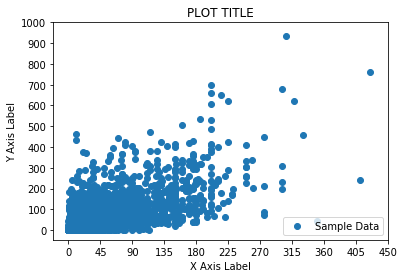

In [84]:
#Trying out a sample plot
%matplotlib inline
import numpy as np
data1 = new_joined_df_index["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = new_joined_df_index["domestic_gross"].map(lambda x: round(x / 1000000, 2))
# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.

plt.scatter(data1, data2, label='Sample Data')

# Add labels for x and y axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
#Add ticks
xticks = np.linspace(start=0, stop=450, num=11)
yticks = np.linspace(start=0, stop=1000, num=11)
plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
plt.yticks(yticks);
# Add a title for the plot
plt.title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
plt.legend(loc=4)

# Output the final plot
plt.show()

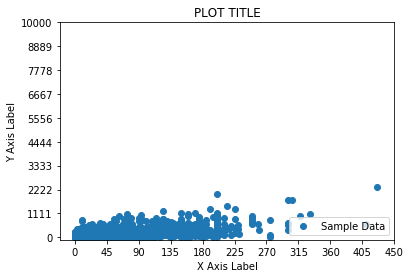

In [100]:
data1 = df["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = df["net_prof"].map(lambda x: round(x / 1000000, 2))
# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.

plt.scatter(data1, data2, label='Sample Data')

# Add labels for x and y axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
#Add ticks
xticks = np.linspace(start=0, stop=450, num=11)
yticks = np.linspace(start=0, stop=10000, num=10)
plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
plt.yticks(yticks);
# Add a title for the plot
plt.title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
plt.legend(loc=4)

# Output the final plot
plt.show()

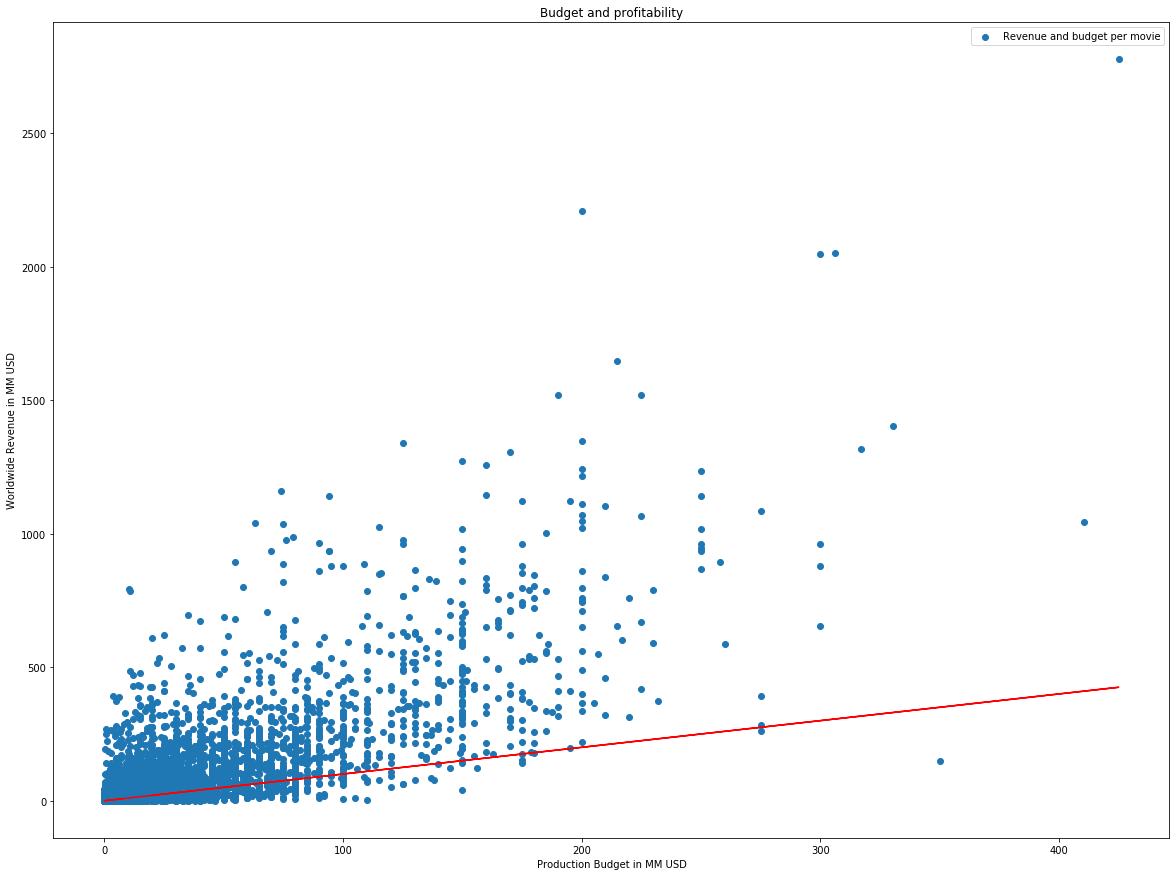

In [136]:
#Plotting budget and worldwide gross
#Trying out a sample plot
%matplotlib inline
import numpy as np
data1 = new_joined_df_index["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = new_joined_df_index["worldwide_gross"].map(lambda x: round(x / 1000000, 2))
# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
#Figure
new_figure = plt.figure(figsize=(20,15))
# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)
#scatter of budget and worldwide gross
ax.scatter(data1, data2, label='Sample Data')
ax.legend(["Revenue and budget per movie"])
#line plot 
ax.plot(data1, data1, color="r")

#plt.scatter(data1, data2, label='Sample Data')

# Add labels for x and y axes
plt.xlabel('Production Budget in MM USD')
plt.ylabel('Worldwide Revenue in MM USD')

#Add Legend

#Add ticks
#Set limits for x and y axis

#Add title
plt.title("Budget and profitability")
#xticks = np.linspace(start=0, stop=450, num=11)
#yticks = np.linspace(start=0, stop=1000, num=11)
#plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
#plt.yticks(yticks);
# Add a title for the plot
#plt.title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
#plt.legend(loc=4)

# Output the final plot
plt.show()